<a href="https://colab.research.google.com/github/irythmgarg/Univarient_Random_Sample_Imputation/blob/main/Univarient_Random_Sample_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Univarient Random Sample Imputation for missing data**


In [36]:
import pandas as pd # import pandas class
import numpy as np #import numpy

In [37]:
df=pd.read_csv('/content/titanic.csv',usecols=['Survived'	,'Pclass','Sex',	'Age',	'Fare',	'Embarked']); # dataset with only required features
df.head() # first five rows of the dataset

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [38]:
df.isnull().sum() # columnwise null values in the dataFrame

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [39]:
x=df.iloc[:,1:]; # independent featurs
y=df.iloc[:,0]; #dependent featurs
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [40]:
x.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


In [47]:
from sklearn.model_selection import train_test_split # import train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0);

In [48]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked
140,3,female,NaN,15.2458,C
439,2,male,31.0,10.5000,S
817,2,male,31.0,37.0042,C
378,3,male,20.0,4.0125,C
491,3,male,21.0,7.2500,S


In [49]:
x_test.head()

,Pclass,Sex,Age,Fare,Embarked
495,3,male,NaN,14.4583,C
648,3,male,NaN,7.5500,S
278,3,male,7.0,29.1250,Q
31,1,female,NaN,146.5208,C
255,3,female,29.0,15.2458,C


In [86]:
x_train['Age_impute']=x_train['Age']; # make another feature age_impute as same as age
x_test['Age_impute']=x_test['Age'];
x_train.head()

,Pclass,Sex,Age,Fare,Embarked,Age_impute
140,3,female,NaN,15.2458,C,NaN
439,2,male,31.0,10.5000,S,31.0
817,2,male,31.0,37.0042,C,31.0
378,3,male,20.0,4.0125,C,20.0
491,3,male,21.0,7.2500,S,21.0


In [87]:
x_test.head()

,Pclass,Sex,Age,Fare,Embarked,Age_impute
495,3,male,NaN,14.4583,C,NaN
648,3,male,NaN,7.5500,S,NaN
278,3,male,7.0,29.1250,Q,7.0
31,1,female,NaN,146.5208,C,NaN
255,3,female,29.0,15.2458,C,29.0


In [88]:
x_train['Age_impute'][x_train['Age_impute'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).value
s# impute null values in the age impute column with random valeus in the same column
x_train.head()

<ipython-input-88-47334688f957>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['Age_impute'][x_train['Age_impute'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values


,Pclass,Sex,Age,Fare,Embarked,Age_impute
140,3,female,NaN,15.2458,C,33.0
439,2,male,31.0,10.5000,S,31.0
817,2,male,31.0,37.0042,C,31.0
378,3,male,20.0,4.0125,C,20.0
491,3,male,21.0,7.2500,S,21.0


In [89]:
x_test['Age_impute'][x_test['Age_impute'].isnull()]=x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values
x_test.head() # same for the test dataFrame

<ipython-input-89-54d7ffb99443>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Age_impute'][x_test['Age_impute'].isnull()]=x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values


,Pclass,Sex,Age,Fare,Embarked,Age_impute
495,3,male,NaN,14.4583,C,30.0
648,3,male,NaN,7.5500,S,24.0
278,3,male,7.0,29.1250,Q,7.0
31,1,female,NaN,146.5208,C,19.0
255,3,female,29.0,15.2458,C,29.0


,Pclass,Sex,Age,Fare,Embarked,Age_impute
140,3,female,NaN,15.2458,C,33.0
439,2,male,31.0,10.5000,S,31.0
817,2,male,31.0,37.0042,C,31.0
378,3,male,20.0,4.0125,C,20.0
491,3,male,21.0,7.2500,S,21.0


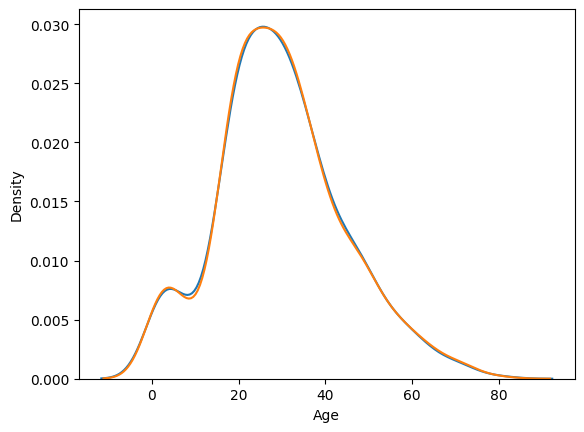

In [90]:
import seaborn as sns
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['Age_impute'])
x_train.head()
# compare prability distribution of the both ages with and without imputation

In [ ]:
# do same for the x_test

,Pclass,Sex,Age,Fare,Embarked,Age_impute
495,3,male,NaN,14.4583,C,30.0
648,3,male,NaN,7.5500,S,24.0
278,3,male,7.0,29.1250,Q,7.0
31,1,female,NaN,146.5208,C,19.0
255,3,female,29.0,15.2458,C,29.0


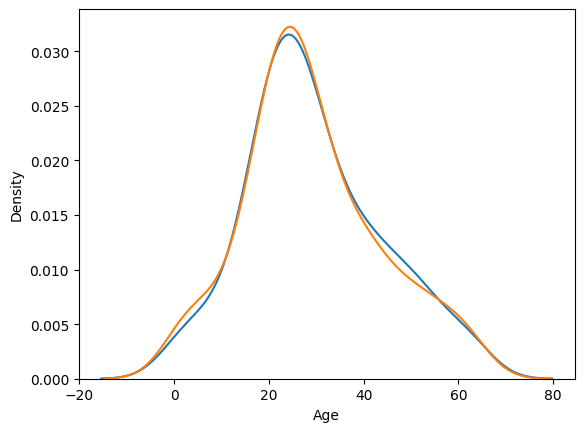

In [91]:
sns.kdeplot(x_test['Age'])
sns.kdeplot(x_test['Age_impute'])
x_test.head()

In [ ]:
# as from the above figures we can see that there are only small deviations in the kde plot
# so we can apply this imputation method here